In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes/diabetes.csv


# Importing Necessary Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/diabetes/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Dataset Description

The diabetes dataset, often referred to in the context of the Pima Indians Diabetes Database, is a classic dataset used for binary classification problems in machine learning. It is commonly used to demonstrate various data analysis and machine learning techniques.

### Overview of the Diabetes Dataset

The dataset contains medical information for a sample of female patients of Pima Indian heritage, all of whom are at least 21 years old. The primary goal is to predict whether a patient has diabetes based on certain diagnostic measurements.

### Attributes (Features)

The dataset typically consists of the following columns (features):

1. **Pregnancies**: Number of times the patient has been pregnant.
2. **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. **BloodPressure**: Diastolic blood pressure (mm Hg).
4. **SkinThickness**: Triceps skin fold thickness (mm).
5. **Insulin**: 2-Hour serum insulin (mu U/ml).
6. **BMI**: Body mass index (weight in kg/(height in m)^2).
7. **DiabetesPedigreeFunction**: Diabetes pedigree function, which is a function that scores the likelihood of diabetes based on family history.
8. **Age**: Age of the patient (years).
9. **Outcome**: Class variable (0 or 1), where 1 indicates the presence of diabetes and 0 indicates the absence.

### Target Variable

- **Outcome**: This is the target variable that the models aim to predict. It is a binary variable with values:
  - `0`: The patient does not have diabetes.
  - `1`: The patient has diabetes.


In summary, the diabetes dataset provides a practical case for applying various data science techniques, from data preprocessing and visualization to model building and evaluation, making it an excellent resource for learning and experimentation.

In [4]:
# Checking for null values

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Explanation

The `describe()` method provides a summary of statistics pertaining to the DataFrame's numerical columns. By default, it includes the following statistics for each numerical column:

- **Count**: The number of non-missing values.
- **Mean**: The average of the values.
- **Std (Standard Deviation)**: The standard deviation of the values, which measures the amount of variation or dispersion of the values.
- **Min**: The minimum value.
- **25%**: The 25th percentile (also known as the first quartile), indicating that 25% of the data points are below this value.
- **50%**: The 50th percentile (also known as the median), indicating that 50% of the data points are below this value.
- **75%**: The 75th percentile (also known as the third quartile), indicating that 75% of the data points are below this value.
- **Max**: The maximum value.

### Purpose

The purpose of using `df.describe()` is to get a quick statistical summary of the numerical data in the DataFrame. This summary provides insights into the distribution and spread of the data, helping to identify:
- **Outliers**: Extremely high or low values.
- **Central Tendency**: Mean and median values to understand the center of the data.
- **Spread**: Standard deviation and range (min to max) to understand the variability in the data.
- **Data Quality**: By comparing counts across columns, one can detect missing values (if `count` is less than the total number of rows).

### Usage in Data Analysis

In data analysis, `df.describe()` is commonly used during the exploratory data analysis (EDA) phase to:
- Get an initial understanding of the dataset.
- Identify potential issues with the data, such as outliers or missing values.
- Formulate hypotheses about the data.
- Guide further detailed analysis and data cleaning steps.

In summary, `df.describe()` is a powerful tool for quickly obtaining a statistical overview of a pandas DataFrame, aiding in the understanding and analysis of the data.

In [6]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# Data Preprocessing

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
col = df.columns[:-1]
col

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [9]:
for i in col:
    print(i, len(df.loc[df[i] == 0]))

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0


### Explanation

1. **`df.columns[:-1]`**:
   - `df.columns` is a pandas property that returns an Index object containing the column labels of the DataFrame `df`.
   - `[:-1]` is slicing notation that selects all columns except the last one. This is useful if the last column is the target variable, and you want to focus on the feature columns.

2. **`col = df.columns[:-1]`**:
   - This assigns the list of all columns except the last one to the variable `col`.

3. **`for i in col:`**:
   - This initiates a for loop that iterates over each column name in `col`.

4. **`df.loc[df[i] == 0]`**:
   - `df.loc` is used to access a group of rows and columns by labels or a boolean array.
   - `df[i] == 0` creates a boolean Series that is `True` where the column `i` has a value of 0 and `False` elsewhere.
   - `df.loc[df[i] == 0]` selects all rows where the column `i` has a value of 0.

5. **`len(df.loc[df[i] == 0])`**:
   - This calculates the number of rows where the column `i` has a value of 0 by getting the length of the DataFrame subset created by `df.loc[df[i] == 0]`.

6. **`print(i, len(df.loc[df[i] == 0]))`**:
   - This prints the column name `i` followed by the count of rows where the column `i` has a value of 0.

### Combined Operation

This code iterates through each column (except the last one) in the DataFrame `df` and prints the name of the column along with the number of rows where the column value is 0.

### Purpose

The purpose of this code is to identify and count the occurrences of zero values in each feature column of the DataFrame. This can be particularly useful for identifying columns where 0 might be used as a placeholder for missing or special values.

This output indicates:
- There are 111 rows where 'Pregnancies' is 0.
- There are 5 rows where 'Glucose' is 0.
- And so on for each column.

### Usage in Data Analysis

Identifying zero values is useful because:
- **Data Cleaning**: Zeros might represent missing or invalid data, especially for biological measurements like glucose or BMI where a value of 0 is not feasible.
- **Feature Engineering**: Knowing where zeros occur can help in deciding how to handle them (e.g., imputation, removal, or special treatment).
- **Exploratory Data Analysis (EDA)**: Provides insights into the data distribution and potential issues that need to be addressed before applying machine learning algorithms.

In summary, this code snippet is used to count and print the number of zero values in each feature column of a DataFrame, which is an essential step in understanding and preprocessing the dataset.

In [10]:
val = SimpleImputer(missing_values = 0, strategy = 'mean', copy = False)
df[col] = val.fit_transform(df[col])

for i in col:
    print(i, len(df.loc[df[i] == 0]))

Pregnancies 0
Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0
DiabetesPedigreeFunction 0
Age 0


### Explanation

1. **`SimpleImputer(missing_values = 0, strategy = "mean", copy = False)`**:
   - `SimpleImputer`: This is a class from the `sklearn.impute` module used for imputing missing values.
   - `missing_values = 0`: This parameter specifies that the value `0` should be treated as missing. This is useful when `0` is used as a placeholder for missing data.
   - `strategy = "mean"`: This parameter specifies that missing values should be replaced with the mean of the column.
   - `copy = False`: This parameter specifies that the imputation should be done in place, modifying the existing DataFrame instead of creating a copy.

2. **`val = SimpleImputer(missing_values = 0, strategy = "mean", copy = False)`**:
   - This line creates an instance of `SimpleImputer` with the specified parameters, stored in the variable `val`.

3. **`df[col] = val.fit_transform(df[col])`**:
   - `df[col]`: This selects the columns specified in `col` from the DataFrame `df`.
   - `val.fit_transform(df[col])`: This method fits the imputer on the selected columns (calculates the mean of each column) and then transforms the columns by replacing the missing values (`0`s) with the calculated means.
   - The transformed columns are then assigned back to `df[col]`, effectively updating the DataFrame with the imputed values.

4. **`for i in col:`**:
   - This initiates a for loop that iterates over each column name in `col`.

5. **`print(i, len(df.loc[df[i] == 0]))`**:
   - This prints the name of the column `i` and the number of rows where the column `i` has a value of `0` after the imputation.

### Combined Operation

The code performs the following steps:
1. Identifies `0` values in the specified columns (`col`) as missing values.
2. Replaces these `0` values with the mean of the respective columns.
3. Prints the count of `0` values in each column after the imputation to verify if there are any remaining `0` values.

### Example in Context

1. Any `0` values in columns such as `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, etc., are replaced with the mean of the respective column.
2. After the imputation, the script prints out the count of remaining `0` values for each column.



### Purpose

The purpose of this code is to handle missing values (represented as `0`s) in the dataset by replacing them with the mean of the respective columns, ensuring that the data is suitable for further analysis or machine learning modeling. The subsequent print statements help verify that the imputation was successful.

### Usage in Data Analysis

This code snippet is part of the data preprocessing phase, ensuring that the dataset has no missing values that could negatively impact the performance of machine learning algorithms. It is crucial for:
- **Data Cleaning**: Replacing invalid or placeholder values with meaningful statistical values.
- **Model Training**: Ensuring the data fed into machine learning models is complete and clean, leading to better model performance.

# Visualizations

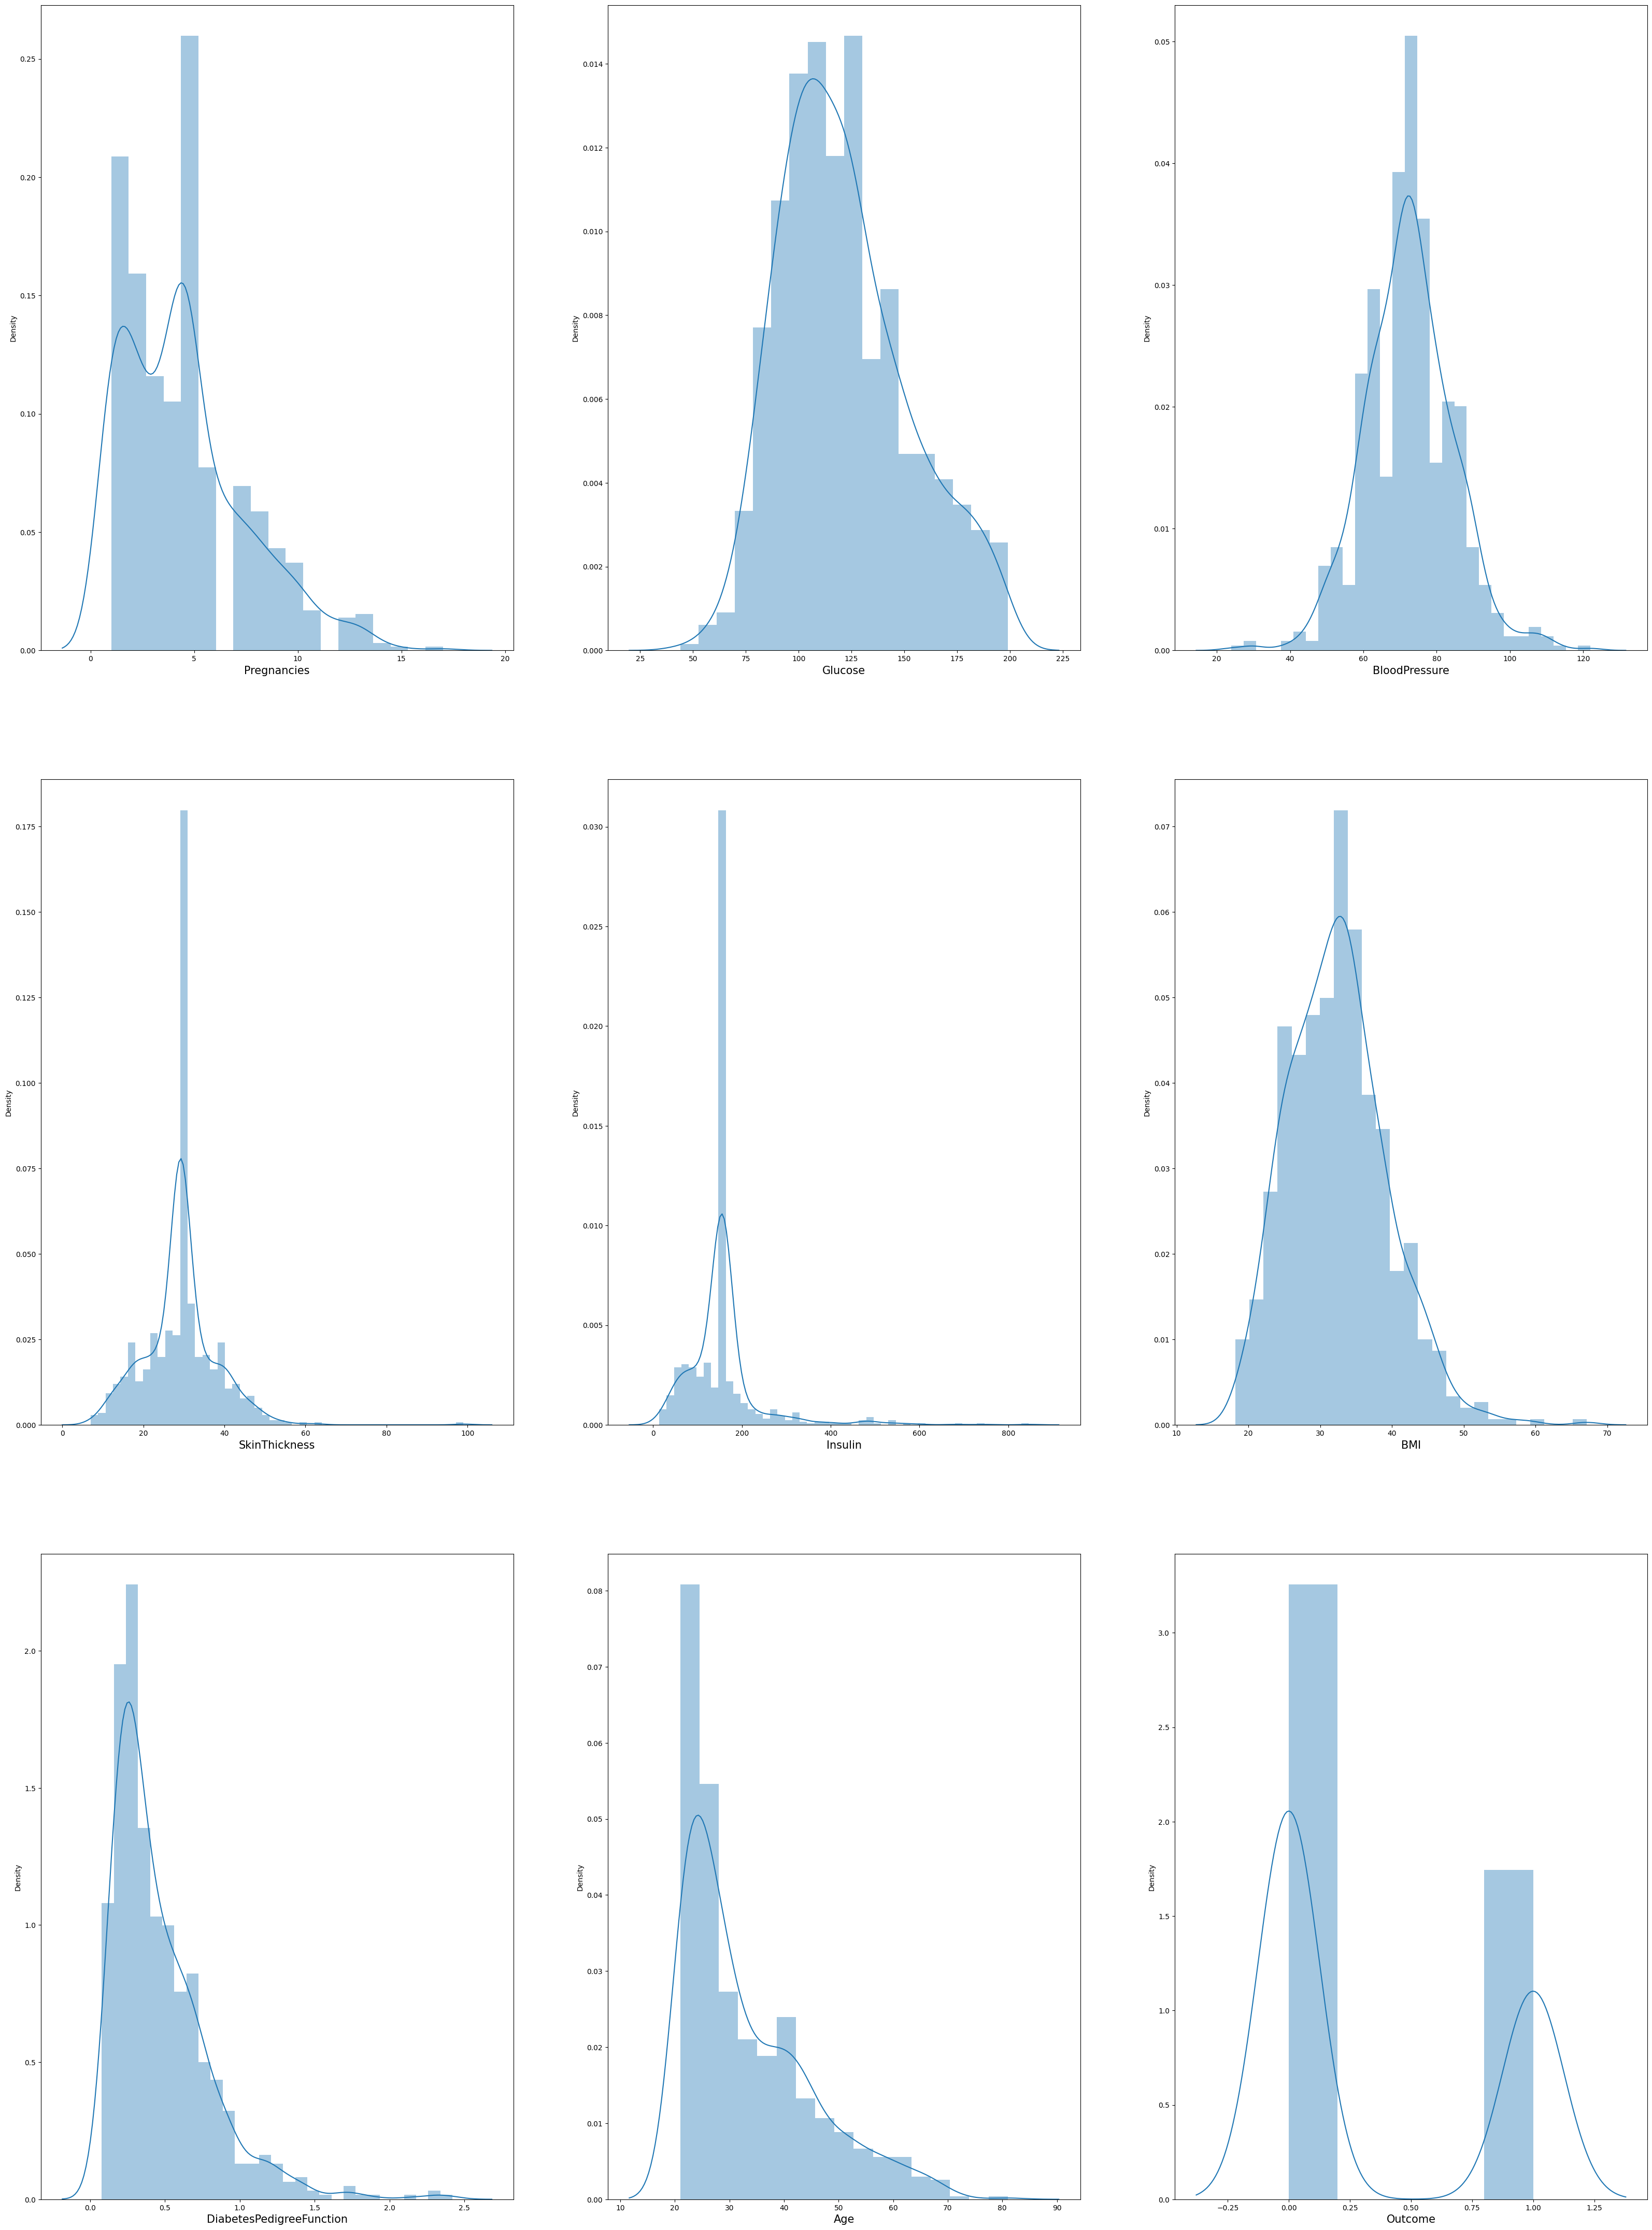

In [11]:
plt.figure(figsize = (40, 55))
plotnumber = 1

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

This code snippet is used to visualize the distribution of each feature in the Pima Indians Diabetes dataset using histograms (or more specifically, kernel density estimates) plotted by Seaborn's `distplot` function. Here's an explanation of each part of the code in the context of this dataset:

1. **Setup for the Figure**:
    ```python
    plt.figure(figsize=(40, 55))
    ```
    - This line sets up the figure size for the plots. The `figsize` parameter is set to (40, 55), which makes the figure quite large, ensuring that each plot within the figure is sufficiently large to be easily readable.

2. **Initialize Plot Number**:
    ```python
    plotnumber = 1
    ```
    - This initializes a counter to keep track of the subplot position.

3. **Iterate through Columns of the DataFrame**:
    ```python
    for column in df:
    ```
    - This loop iterates over each column in the DataFrame `df`. In the context of the Pima Indians Diabetes dataset, these columns might include features like `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, `Age`, and the target variable `Outcome`.

4. **Plot Each Column**:
    ```python
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=15)
    ```
    - The `if plotnumber <= 9:` condition ensures that only the first 9 columns are plotted. This is because the code is set up to create a 3x3 grid of subplots.
    - `ax = plt.subplot(3, 3, plotnumber)` creates a subplot in a 3x3 grid at the position specified by `plotnumber`.
    - `sns.distplot(df[column])` creates a histogram with a kernel density estimate for the current column.
    - `plt.xlabel(column, fontsize=15)` sets the x-axis label of the subplot to the column name and sets the font size to 15.

5. **Increment Plot Number**:
    ```python
    plotnumber += 1
    ```
    - This increments the `plotnumber` so that the next column will be plotted in the next subplot position.

6. **Display the Plots**:
    ```python
    plt.show()
    ```
    - This line displays all the subplots in the figure.

### Context of the Pima Indians Diabetes Dataset

The Pima Indians Diabetes dataset is commonly used for binary classification tasks where the goal is to predict whether a patient has diabetes based on various medical predictor variables. Here's a brief description of the dataset columns:

- `Pregnancies`: Number of times pregnant.
- `Glucose`: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- `BloodPressure`: Diastolic blood pressure (mm Hg).
- `SkinThickness`: Triceps skin fold thickness (mm).
- `Insulin`: 2-Hour serum insulin (mu U/ml).
- `BMI`: Body mass index (weight in kg/(height in m)^2).
- `DiabetesPedigreeFunction`: Diabetes pedigree function.
- `Age`: Age (years).
- `Outcome`: Class variable (0 or 1).

Each subplot will show the distribution of values for one of these features, helping to understand the data better. This visualization can reveal important insights such as the skewness of distributions, presence of outliers, and possible need for data transformation or normalization.

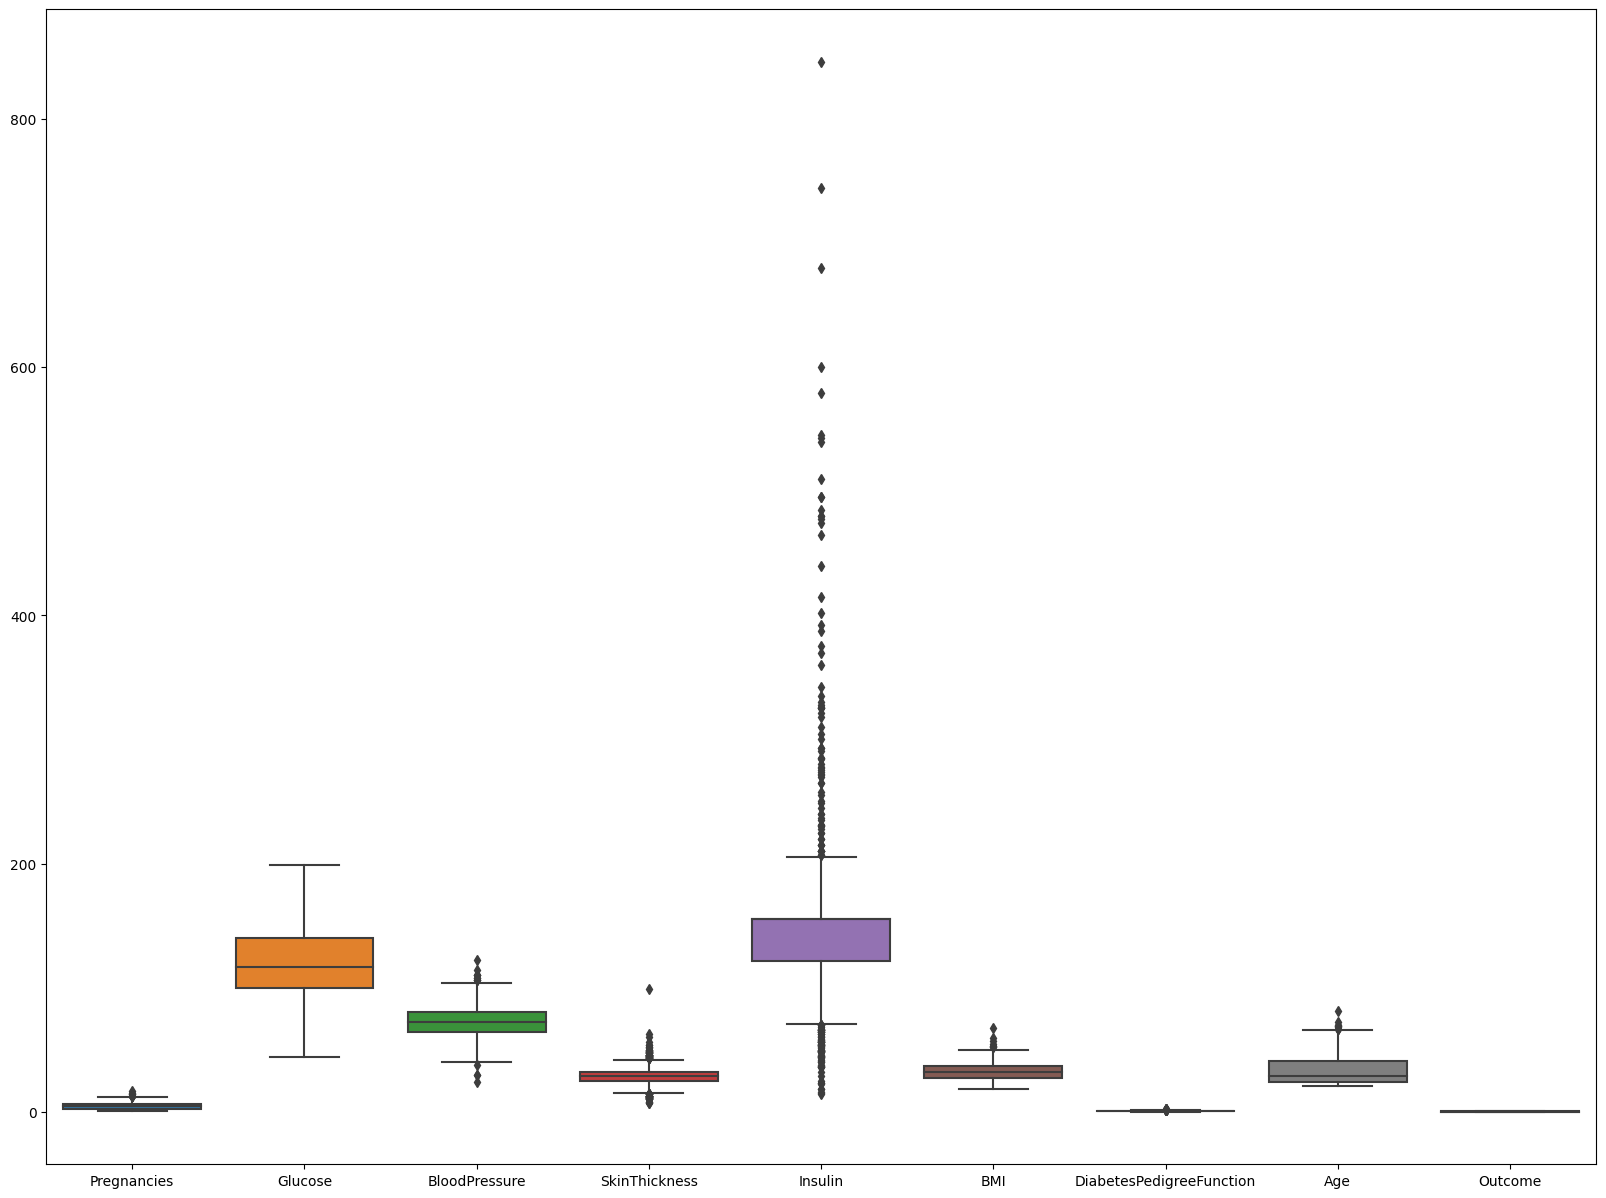

In [12]:
fig, ax = plt.subplots(figsize = (20,15))
sns.boxplot(data = df, ax=ax)
plt.show()

This code snippet creates a boxplot for each feature in the DataFrame `df` using Seaborn and Matplotlib. Here's an explanation of each part of the code:

1. **Setup for the Figure and Axes**:
    ```python
    fig, ax = plt.subplots(figsize=(20, 15))
    ```
    - `fig, ax = plt.subplots(figsize=(20, 15))` initializes a Matplotlib figure (`fig`) and a set of subplots (`ax`). 
    - `figsize=(20, 15)` specifies the size of the figure in inches. This makes the plot larger, ensuring that each boxplot is sufficiently large to be easily readable.

2. **Create a Boxplot**:
    ```python
    sns.boxplot(data=df, ax=ax)
    ```
    - `sns.boxplot(data=df, ax=ax)` creates a boxplot for each column in the DataFrame `df` and plots them on the axes `ax`.
    - `data=df` specifies the DataFrame containing the data to be plotted.
    - `ax=ax` specifies the axes on which to plot the boxplots.

3. **Display the Plot**:
    ```python
    plt.show()
    ```
    - This line displays the plot.

### Context of Boxplot

A boxplot (or whisker plot) provides a graphical summary of the distribution of a dataset. It displays:

- **Median**: The central line inside the box represents the median (50th percentile) of the data.
- **Interquartile Range (IQR)**: The box itself represents the interquartile range, which is the distance between the 25th percentile (Q1) and the 75th percentile (Q3).
- **Whiskers**: The lines extending from the box (whiskers) indicate variability outside the upper and lower quartiles. They generally extend to 1.5 times the IQR from the quartiles, but this can vary depending on the plotting library and options.
- **Outliers**: Individual points outside the whiskers represent outliers.

### Context of the Pima Indians Diabetes Dataset

Using this boxplot for the Pima Indians Diabetes dataset, you can visualize the distribution of values for each feature. This helps in understanding the spread and identifying potential outliers or unusual values in the data. Each boxplot will give you insights into the distribution of the features such as `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, `Age`, and `Outcome`.

For example:
- **Glucose**: You can observe the median glucose level and the spread of glucose values.
- **Insulin**: You might see if there are any significant outliers in insulin levels.
- **Age**: The boxplot can reveal the age distribution of the participants.

This visualization helps in diagnosing data quality issues and guiding data preprocessing steps such as normalization, handling outliers, and feature engineering.

## Removing Outliers

In [13]:
outlier = df['Pregnancies'].quantile(0.98)
df = df[df['Pregnancies']<outlier]

outlier = df['BMI'].quantile(0.99)
df = df[df['BMI']<outlier]

outlier = df['SkinThickness'].quantile(0.99)
df = df[df['SkinThickness']<outlier]

outlier = df['Insulin'].quantile(0.95)
df = df[df['Insulin']<outlier]

outlier = df['DiabetesPedigreeFunction'].quantile(0.99)
df = df[df['DiabetesPedigreeFunction']<outlier]

outlier = df['Age'].quantile(0.99)
df = df[df['Age']<outlier]

This code snippet is used to remove outliers from specific columns in a DataFrame `df` based on quantile thresholds. Here's a step-by-step explanation:

1. **Removing Outliers in the 'Pregnancies' Column**:
    ```python
    outlier = df['Pregnancies'].quantile(0.98)
    df = df[df['Pregnancies'] < outlier]
    ```
    - `outlier = df['Pregnancies'].quantile(0.98)`: This line calculates the 98th percentile value for the 'Pregnancies' column. The 98th percentile is the value below which 98% of the data falls.
    - `df = df[df['Pregnancies'] < outlier]`: This line filters the DataFrame to keep only the rows where the 'Pregnancies' value is less than the 98th percentile. This effectively removes the top 2% of the highest values in the 'Pregnancies' column, treating them as outliers.

2. **Removing Outliers in the 'BMI' Column**:
    ```python
    outlier = df['BMI'].quantile(0.99)
    df = df[df['BMI'] < outlier]
    ```
    - `outlier = df['BMI'].quantile(0.99)`: This line calculates the 99th percentile value for the 'BMI' column.
    - `df = df[df['BMI'] < outlier]`: This line filters the DataFrame to keep only the rows where the 'BMI' value is less than the 99th percentile, removing the top 1% of the highest values in the 'BMI' column.

3. **Removing Outliers in the 'SkinThickness' Column**:
    ```python
    outlier = df['SkinThickness'].quantile(0.99)
    df = df[df['SkinThickness'] < outlier]
    ```
    - `outlier = df['SkinThickness'].quantile(0.99)`: This line calculates the 99th percentile value for the 'SkinThickness' column.
    - `df = df[df['SkinThickness'] < outlier]`: This line filters the DataFrame to keep only the rows where the 'SkinThickness' value is less than the 99th percentile, removing the top 1% of the highest values in the 'SkinThickness' column.

4. **Removing Outliers in the 'Insulin' Column**:
    ```python
    outlier = df['Insulin'].quantile(0.95)
    df = df[df['Insulin'] < outlier]
    ```
    - `outlier = df['Insulin'].quantile(0.95)`: This line calculates the 95th percentile value for the 'Insulin' column.
    - `df = df[df['Insulin'] < outlier]`: This line filters the DataFrame to keep only the rows where the 'Insulin' value is less than the 95th percentile, removing the top 5% of the highest values in the 'Insulin' column.

5. **Removing Outliers in the 'DiabetesPedigreeFunction' Column**:
    ```python
    outlier = df['DiabetesPedigreeFunction'].quantile(0.99)
    df = df[df['DiabetesPedigreeFunction'] < outlier]
    ```
    - `outlier = df['DiabetesPedigreeFunction'].quantile(0.99)`: This line calculates the 99th percentile value for the 'DiabetesPedigreeFunction' column.
    - `df = df[df['DiabetesPedigreeFunction'] < outlier]`: This line filters the DataFrame to keep only the rows where the 'DiabetesPedigreeFunction' value is less than the 99th percentile, removing the top 1% of the highest values in the 'DiabetesPedigreeFunction' column.

6. **Removing Outliers in the 'Age' Column**:
    ```python
    outlier = df['Age'].quantile(0.99)
    df = df[df['Age'] < outlier]
    ```
    - `outlier = df['Age'].quantile(0.99)`: This line calculates the 99th percentile value for the 'Age' column.
    - `df = df[df['Age'] < outlier]`: This line filters the DataFrame to keep only the rows where the 'Age' value is less than the 99th percentile, removing the top 1% of the highest values in the 'Age' column.

### Context of the Pima Indians Diabetes Dataset

The Pima Indians Diabetes dataset consists of medical records for women of Pima Indian heritage. Removing outliers helps to ensure that extreme values do not skew the results of any analysis or modeling. This preprocessing step is crucial for improving the performance of machine learning models by ensuring that the data is clean and that the models do not overfit to extreme values.

By removing the top 1-5% of extreme values from each column, the dataset becomes more robust and less sensitive to outliers, which can improve the accuracy and reliability of predictive models.

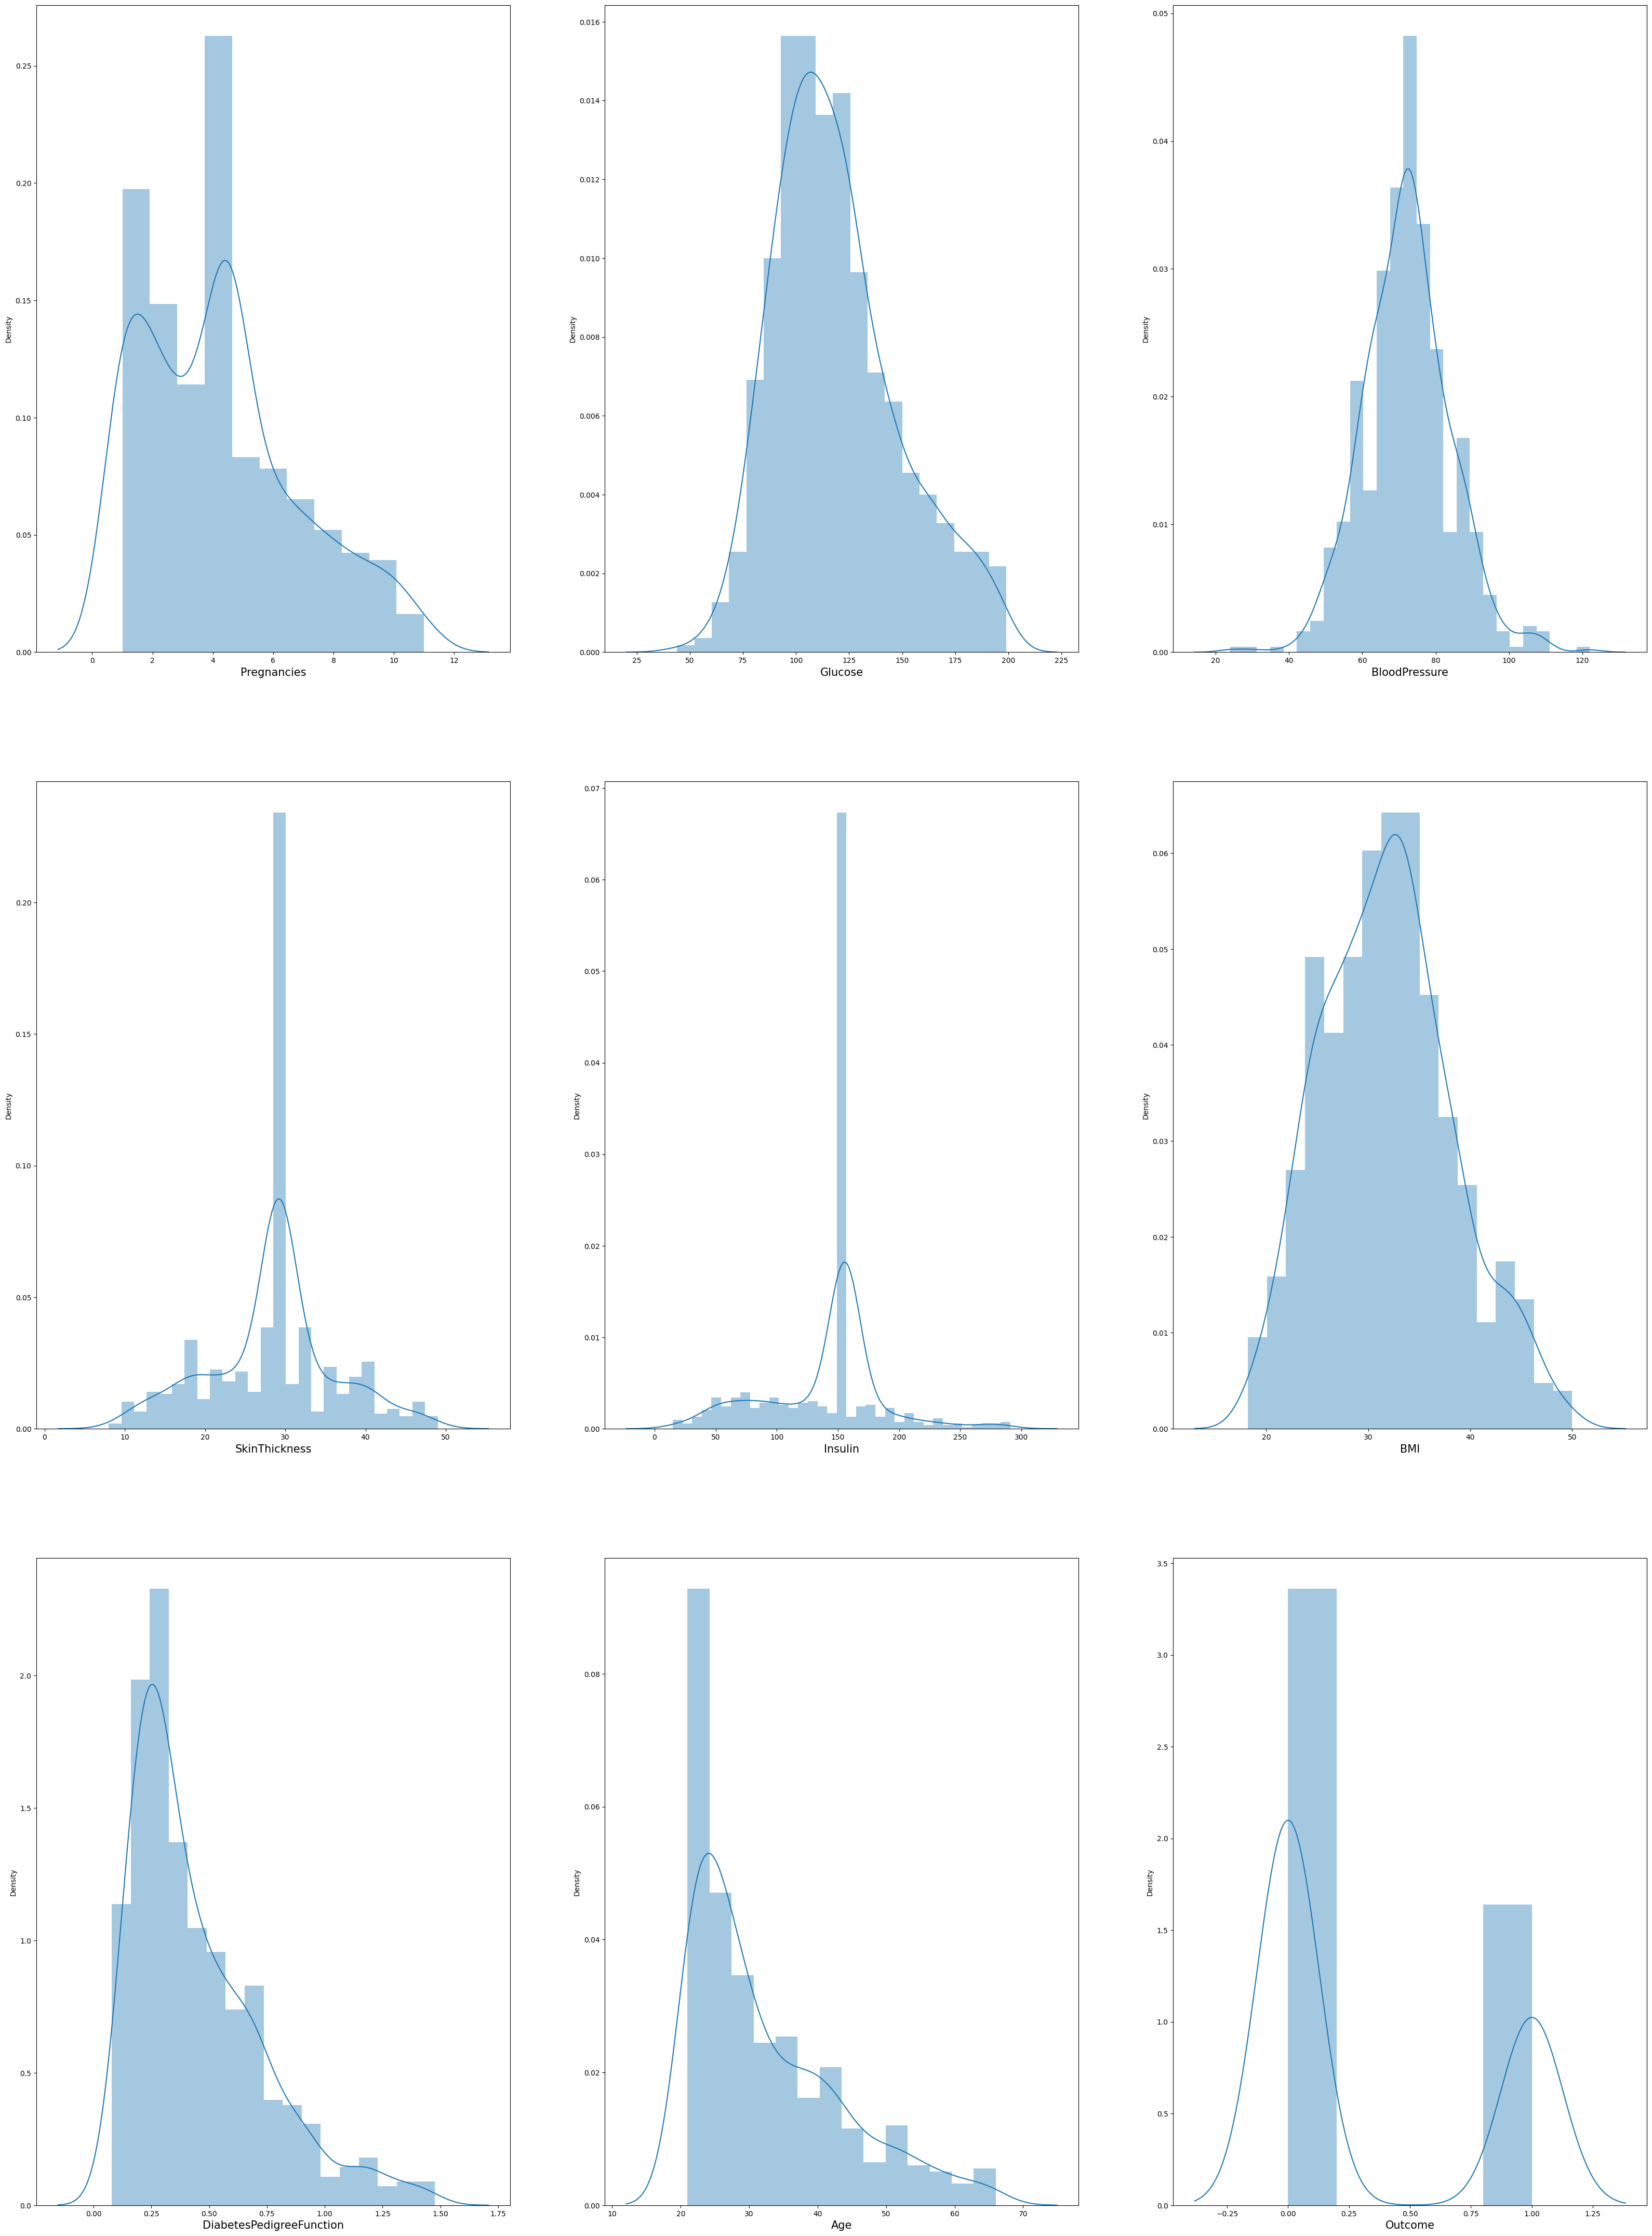

In [14]:
# Rechecking the distribution

plt.figure(figsize = (40, 55))
plotnumber = 1

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

# Train_Test_Split

In [15]:
x = df.drop(columns = 'Outcome', axis = 1)
y = df['Outcome']

In [16]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

This line of code splits your dataset into training and testing subsets. Here’s a detailed explanation of each component:

### Code Breakdown


1. **`train_test_split` Function**:
   - This function is from the `sklearn.model_selection` module and is used to split arrays or matrices into random train and test subsets.
   - The function helps to evaluate machine learning models by training on one subset of the data and testing on another, unseen subset.

2. **Parameters**:
   - `x`: This represents the feature matrix (independent variables). It's typically a 2D array where each row is a data sample and each column is a feature.
   - `y`: This represents the target vector (dependent variable or labels). It's typically a 1D array where each element is the label corresponding to the rows in `x`.
   - `test_size=0.25`: This parameter specifies the proportion of the dataset to include in the test split. `0.25` means 25% of the data will be used for testing, and the remaining 75% will be used for training.
   - `random_state=42`: This parameter ensures reproducibility by setting a seed for the random number generator. Using the same `random_state` ensures that you get the same split every time you run the code, which is helpful for consistent results.

3. **Output Variables**:
   - `x_train`: This is the subset of `x` used for training the model. It contains 75% of the original data.
   - `x_test`: This is the subset of `x` used for testing the model. It contains 25% of the original data.
   - `y_train`: This is the subset of `y` corresponding to `x_train`, used for training the model.
   - `y_test`: This is the subset of `y` corresponding to `x_test`, used for testing the model.

### Context of the Pima Indians Diabetes Dataset

In the context of the Pima Indians Diabetes dataset, you would typically perform this split to:

- **Train the Model**: Use `x_train` and `y_train` to train your machine learning model. This is the portion of the data the model learns from.
- **Test the Model**: Evaluate the model’s performance using `x_test` and `y_test`. This allows you to assess how well the model generalizes to unseen data.


In [17]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


This code snippet is used to standardize (or normalize) the feature values in your training and testing datasets. Standardization is an important preprocessing step in many machine learning workflows to ensure that all features contribute equally to the model's performance. Here’s a breakdown of each part:

### Code Breakdown



1. **Initialization of `StandardScaler`**:
   ```python
   sc = StandardScaler()
   ```
   - `StandardScaler` is a class from `sklearn.preprocessing` that standardizes features by removing the mean and scaling to unit variance.
   - This standardization process is important for models that are sensitive to the scale of the input features, such as Support Vector Machines, k-Nearest Neighbors, and Gradient Descent-based algorithms.

2. **Fitting and Transforming the Training Data**:
   ```python
   x_train = sc.fit_transform(x_train)
   ```
   - `fit_transform` is a method that performs two operations in one step:
     - **Fit**: Calculates the mean and standard deviation of the training data (`x_train`).
     - **Transform**: Standardizes the training data based on the calculated mean and standard deviation.
   - Standardization is done by subtracting the mean and dividing by the standard deviation for each feature:
   
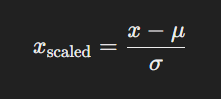

     where  x  is the original feature value, \( \mu \) is the mean of the feature, and \( \sigma \) is the standard deviation of the feature.
   - This ensures that the training data has a mean of 0 and a standard deviation of 1 for each feature.

3. **Transforming the Testing Data**:
   ```python
   x_test = sc.transform(x_test)
   ```
   - `transform` applies the standardization parameters (mean and standard deviation) computed from the training data to the testing data.
   - It does not fit the data again, but instead, it uses the mean and standard deviation from the training data to standardize the testing data. This is crucial because you should not use information from the test data to standardize the data; you want to apply the same scaling that was used on the training data.

### Context of the Pima Indians Diabetes Dataset

In the context of the Pima Indians Diabetes dataset, this standardization process ensures that:

- **Features are Comparable**: All features are on the same scale, which helps in improving the performance and stability of many machine learning algorithms.
- **Model Performance**: Many algorithms, especially those relying on distance metrics (like k-Nearest Neighbors) or gradient-based optimization (like linear regression and neural networks), can perform better when features are standardized.



# Model Building

Boosting is an ensemble learning technique in machine learning that aims to improve the performance of a model by combining the predictions of multiple weak learners to create a strong learner. Here’s an explanation of boosting and its types:

### What is Boosting?

**Boosting** involves sequentially training a series of models, where each subsequent model attempts to correct the errors made by the previous models. The key idea is to convert a collection of weak models (models that perform slightly better than random guessing) into a single strong model. This is achieved through the following steps:

1. **Training a Weak Learner**: A weak learner is a model that performs only slightly better than random chance. In boosting, this is usually a simple model like a decision tree with limited depth (stump).

2. **Evaluating Errors**: After training the weak learner, the errors it made are identified. These errors are instances where the model’s predictions were incorrect.

3. **Reweighting**: The instances where the model made errors are given more weight, while the correctly predicted instances are given less weight. This reweighting helps the next weak learner focus on the examples that were previously misclassified.

4. **Training a New Learner**: A new weak learner is trained on the reweighted data, with more emphasis on the misclassified instances.

5. **Combining Learners**: The predictions of all weak learners are combined, often through weighted voting or averaging. Each weak learner’s contribution is weighted based on its performance.

6. **Iterating**: Steps 2-5 are repeated for a predefined number of iterations or until no further improvements can be made. Each iteration builds a new model that corrects errors from the previous models.

The final model is a weighted combination of all the weak learners, and it generally performs much better than any individual weak learner.

### Types of Boosting

There are several boosting algorithms, each with different approaches to combining weak learners and handling errors. The most common types are:

1. **AdaBoost (Adaptive Boosting)**:
   - **Description**: AdaBoost adjusts the weights of misclassified instances to focus on harder-to-predict samples. It combines weak learners, usually decision trees, and gives more weight to classifiers that perform well on the hard examples.
   - **Key Concept**: Focuses on the instances that previous classifiers got wrong.
   - **Popular Algorithms**: `AdaBoostClassifier` in scikit-learn.

2. **Gradient Boosting**:
   - **Description**: Gradient Boosting builds models sequentially, each new model correcting errors made by the previous model. It minimizes a loss function by adding weak learners in a gradient descent fashion.
   - **Key Concept**: Fits new models to the residual errors of previous models.
   - **Popular Algorithms**: `GradientBoostingClassifier` and `GradientBoostingRegressor` in scikit-learn.

3. **XGBoost (Extreme Gradient Boosting)**:
   - **Description**: XGBoost is an optimized version of gradient boosting that includes regularization to prevent overfitting. It is highly efficient and widely used in competitive machine learning.
   - **Key Concept**: Improves upon gradient boosting with additional features like regularization and parallel processing.
   - **Popular Algorithms**: `XGBClassifier` and `XGBRegressor` in the XGBoost library.

4. **LightGBM (Light Gradient Boosting Machine)**:
   - **Description**: LightGBM is another gradient boosting framework that is designed to be distributed and efficient, particularly on large datasets. It uses a histogram-based algorithm to speed up the training process.
   - **Key Concept**: Efficiently handles large datasets and provides faster training with lower memory usage.
   - **Popular Algorithms**: `LGBMClassifier` and `LGBMRegressor` in the LightGBM library.

5. **CatBoost (Categorical Boosting)**:
   - **Description**: CatBoost is a gradient boosting library that is specifically designed to handle categorical features effectively without the need for extensive preprocessing. It uses sophisticated methods to deal with categorical data.
   - **Key Concept**: Handles categorical variables efficiently and provides robust performance.
   - **Popular Algorithms**: `CatBoostClassifier` and `CatBoostRegressor` in the CatBoost library.

### Summary

Boosting improves model performance by focusing on errors made by previous models and combining multiple weak learners to create a strong predictive model. It’s a powerful technique that can be implemented in various ways, including AdaBoost, Gradient Boosting, XGBoost, LightGBM, and CatBoost, each with its own strengths and specific applications.

## Gradient Boost

In [18]:
gbr = GradientBoostingClassifier()

The line of code:

```python
gbr = GradientBoostingClassifier()
```

is used to initialize a Gradient Boosting Classifier model from the scikit-learn library. Here’s a detailed explanation:

### Gradient Boosting Classifier

**`GradientBoostingClassifier`** is a class in the `sklearn.ensemble` module of scikit-learn that implements the gradient boosting algorithm for classification tasks. 

### What is Gradient Boosting?

Gradient boosting is an ensemble learning technique that combines multiple weak learners to create a strong model. In the context of classification, the weak learners are typically decision trees. Gradient boosting builds these trees sequentially, with each new tree attempting to correct the errors of the previous trees.

### Breakdown of the Code

1. **`GradientBoostingClassifier()`**:
   - This is the constructor call to create an instance of the `GradientBoostingClassifier` class. It initializes a new Gradient Boosting Classifier object with default hyperparameters.

2. **Assigning to `gbr`**:
   - `gbr` is the variable name assigned to the instance of the `GradientBoostingClassifier`. You will use this variable to fit the model to your data, make predictions, and evaluate its performance.

### Default Hyperparameters

When you initialize `GradientBoostingClassifier()` without any arguments, it uses default hyperparameters. Some of the default hyperparameters include:

- **`n_estimators=100`**: The number of boosting stages to be run (i.e., the number of trees to be built). The default is 100.
- **`learning_rate=0.1`**: The learning rate shrinks the contribution of each tree. The default is 0.1.
- **`max_depth=3`**: The maximum depth of the individual trees. The default is 3.
- **`min_samples_split=2`**: The minimum number of samples required to split an internal node. The default is 2.
- **`min_samples_leaf=1`**: The minimum number of samples required to be at a leaf node. The default is 1.

### Summary

In summary, the line `gbr = GradientBoostingClassifier()` initializes a Gradient Boosting Classifier object, which can then be used for training and making predictions. Gradient boosting is a powerful technique for classification that builds multiple trees in a sequential manner to improve the overall performance of the model.

In [19]:
params = {
    'loss' : ['log_loss', 'exponential'],
    "learning_rate": [0.001,0.1,1,10],
    'n_estimators': [100,150,180,200]
}

gs = GridSearchCV(gbr, params, cv = 5, n_jobs = -1, verbose = 1)
gs.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

This code snippet performs hyperparameter tuning for a `GradientBoostingClassifier` using `GridSearchCV`. Here’s a detailed explanation:

### Code Breakdown


1. **Defining the Hyperparameter Grid**:
   ```python
   params = {
       'loss': ['log_loss', 'exponential'],
       'learning_rate': [0.001, 0.1, 1, 10],
       'n_estimators': [100, 150, 180, 200]
   }
   ```
   - **`params`**: This dictionary defines the grid of hyperparameters to search through. Each key corresponds to a hyperparameter of the `GradientBoostingClassifier`, and the associated list contains the values to try.
     - **`'loss'`**: Specifies the loss function to be used. Options are `'log_loss'` (for logistic regression) and `'exponential'` (for AdaBoost-style loss).
     - **`'learning_rate'`**: Defines the step size used in updating the model. The values range from very small (0.001) to larger (10).
     - **`'n_estimators'`**: The number of boosting stages (trees) to be used. Values range from 100 to 200.

2. **Creating the GridSearchCV Object**:
   ```python
   gs = GridSearchCV(gbr, params, cv=5, n_jobs=-1, verbose=1)
   ```
   - **`GridSearchCV`**: This class from `sklearn.model_selection` performs an exhaustive search over specified hyperparameter values.
   - **`gbr`**: The base estimator, which in this case is an instance of `GradientBoostingClassifier` initialized earlier.
   - **`params`**: The hyperparameter grid to search.
   - **`cv=5`**: Specifies 5-fold cross-validation. The dataset will be split into 5 subsets, and each combination of hyperparameters will be tested on each of these folds, with the remaining folds used for training.
   - **`n_jobs=-1`**: Utilizes all available CPU cores for parallel processing, speeding up the grid search.
   - **`verbose=1`**: Provides information about the progress of the grid search, with higher verbosity levels showing more details.

3. **Fitting the GridSearchCV Object**:
   ```python
   gs.fit(x_train, y_train)
   ```
   - **`gs.fit(x_train, y_train)`**: This line starts the grid search process. It:
     - Iterates over all combinations of hyperparameters specified in `params`.
     - Trains the `GradientBoostingClassifier` with each combination using the training data (`x_train` and `y_train`).
     - Evaluates each combination using 5-fold cross-validation.
     - Identifies the best set of hyperparameters based on cross-validation performance.

### Purpose of GridSearchCV

- **Hyperparameter Tuning**: The primary goal is to find the optimal hyperparameters for the `GradientBoostingClassifier` to improve its performance.
- **Cross-Validation**: Ensures that the model's performance is evaluated in a robust manner, reducing the likelihood of overfitting to the training data.


### Summary

- **`params`** defines the hyperparameter values to search over.
- **`GridSearchCV`** performs an exhaustive search to find the best combination of hyperparameters.
- **`gs.fit(x_train, y_train)`** trains and evaluates multiple models using cross-validation to determine the best hyperparameters.
- This process helps improve the model's performance by selecting the most suitable hyperparameter values.

In [20]:
print(gs.best_params_)
print(gs.best_score_)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 150}
0.7861386138613862


In [21]:
gb = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
gb.fit(x_train, y_train)

y_pred = gb.predict(x_test)

gb_train_acc = accuracy_score(y_train, gb.predict(x_train))
gb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Gradient Boosting Classifier Model is {gb_train_acc}")
print(f"Test Accuracy of Gradient Boosting Classifier Model is {gb_test_acc}")

Training Accuracy of Gradient Boosting Classifier Model is 0.9722772277227723
Test Accuracy of Gradient Boosting Classifier Model is 0.7396449704142012


In [22]:
confusion_matrix(y_test, y_pred)

array([[92, 24],
       [20, 33]])

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       116
           1       0.58      0.62      0.60        53

    accuracy                           0.74       169
   macro avg       0.70      0.71      0.70       169
weighted avg       0.75      0.74      0.74       169



## Stocastic Gradient Boost

In [24]:
sgb = GradientBoostingClassifier(learning_rate = 0.1, subsample = 0.9, max_features = 0.75, loss = 'exponential', n_estimators = 150)
sgb.fit(x_train, y_train)

y_pred = sgb.predict(x_test)

sgb_train_acc = accuracy_score(y_train, sgb.predict(x_train))
sgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Gradient Boosting Classifier Model is {sgb_train_acc}")
print(f"Test Accuracy of Gradient Boosting Classifier Model is {sgb_test_acc}")

Training Accuracy of Gradient Boosting Classifier Model is 0.9623762376237623
Test Accuracy of Gradient Boosting Classifier Model is 0.6923076923076923


This code snippet demonstrates the use of a Gradient Boosting Classifier with specified hyperparameters to train and evaluate the model. Here’s a detailed explanation in terms of the Gradient Boosting Classifier (SGB - Stochastic Gradient Boosting):

### Detailed Explanation

1. **Initializing the Gradient Boosting Classifier**:
   ```python
   sgb = GradientBoostingClassifier(
       learning_rate=0.1, 
       subsample=0.9, 
       max_features=0.75, 
       loss='exponential', 
       n_estimators=150
   )
   ```
   - **`GradientBoostingClassifier`**: A class from `sklearn.ensemble` that implements the gradient boosting algorithm for classification tasks.
   - **Hyperparameters**:
     - **`learning_rate=0.1`**: The learning rate (or shrinkage parameter) controls the contribution of each tree to the final model. A lower learning rate means that each tree's contribution is smaller, and more trees are needed to achieve good performance.
     - **`subsample=0.9`**: The fraction of samples to be used for fitting the individual base learners. A value less than 1.0 indicates that each tree is fit on a random subset of the training data, which can help reduce overfitting and make the model more robust.
     - **`max_features=0.75`**: The fraction of features to consider when looking for the best split. Setting this to a fraction (e.g., 0.75) means that only a subset of features is considered for each tree, which can improve performance and reduce overfitting.
     - **`loss='exponential'`**: The loss function to be minimized. 'exponential' corresponds to AdaBoost-style loss, which can be useful for improving model performance on hard-to-classify samples.
     - **`n_estimators=150`**: The number of boosting stages (i.e., trees) to be used. More trees generally improve performance, but also increase computation time and risk of overfitting.

2. **Fitting the Model**:
   ```python
   sgb.fit(x_train, y_train)
   ```
   - **`fit`**: Trains the Gradient Boosting Classifier using the training data (`x_train` and `y_train`).

3. **Making Predictions**:
   ```python
   y_pred = sgb.predict(x_test)
   ```
   - **`predict`**: Uses the trained model to make predictions on the test data (`x_test`).

4. **Evaluating Model Performance**:
   ```python
   sgb_train_acc = accuracy_score(y_train, sgb.predict(x_train))
   sgb_test_acc = accuracy_score(y_test, y_pred)
   ```
   - **`accuracy_score`**: A function from `sklearn.metrics` that calculates the accuracy of the model.
   - **`sgb_train_acc`**: Accuracy score on the training data. It measures how well the model performs on the data it was trained on.
   - **`sgb_test_acc`**: Accuracy score on the test data. It measures how well the model generalizes to new, unseen data.

5. **Printing the Results**:
   ```python
   print(f"Training Accuracy of Gradient Boosting Classifier Model is {sgb_train_acc}")
   print(f"Test Accuracy of Gradient Boosting Classifier Model is {sgb_test_acc}")
   ```
   - **`print`**: Displays the training and test accuracies of the Gradient Boosting Classifier. This helps in understanding how well the model performs both on the training data and on unseen test data.

### Summary

- **`sgb`**: An instance of `GradientBoostingClassifier` with specified hyperparameters for learning rate, subsample size, maximum features per split, loss function, and number of estimators.
- **`fit`**: Trains the model using the training data.
- **`predict`**: Makes predictions on the test data.
- **`accuracy_score`**: Computes the accuracy of the model on both training and test datasets.
- **`print`**: Outputs the accuracy scores to evaluate the model’s performance.

This process helps in training a Gradient Boosting Classifier with specific settings and evaluating its performance to ensure it works well on both seen and unseen data.

In [25]:
confusion_matrix(y_test, y_pred)

array([[87, 29],
       [23, 30]])

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       116
           1       0.51      0.57      0.54        53

    accuracy                           0.69       169
   macro avg       0.65      0.66      0.65       169
weighted avg       0.70      0.69      0.70       169



## Cat Boosting

In [27]:
cat = CatBoostClassifier()

params = {
    'iterations' : [30,50,100],
    'learning_rate': [0.01,0.1,0.2],
    'depth':[3,4,5]
}

gs = GridSearchCV(estimator = cat, param_grid = params, cv = 5, scoring = 'accuracy')
gs.fit(x_train,y_train)

0:	learn: 0.6902263	total: 53ms	remaining: 1.54s
1:	learn: 0.6876580	total: 54.1ms	remaining: 757ms
2:	learn: 0.6850646	total: 54.4ms	remaining: 490ms
3:	learn: 0.6826593	total: 54.8ms	remaining: 356ms
4:	learn: 0.6808083	total: 55ms	remaining: 275ms
5:	learn: 0.6784248	total: 55.3ms	remaining: 221ms
6:	learn: 0.6760147	total: 55.6ms	remaining: 183ms
7:	learn: 0.6733219	total: 55.8ms	remaining: 154ms
8:	learn: 0.6705781	total: 56.2ms	remaining: 131ms
9:	learn: 0.6681633	total: 56.4ms	remaining: 113ms
10:	learn: 0.6661346	total: 56.7ms	remaining: 97.9ms
11:	learn: 0.6639419	total: 57ms	remaining: 85.5ms
12:	learn: 0.6614542	total: 57.2ms	remaining: 74.9ms
13:	learn: 0.6592906	total: 57.5ms	remaining: 65.7ms
14:	learn: 0.6577950	total: 57.8ms	remaining: 57.8ms
15:	learn: 0.6559988	total: 58.1ms	remaining: 50.8ms
16:	learn: 0.6535679	total: 58.4ms	remaining: 44.6ms
17:	learn: 0.6512626	total: 58.6ms	remaining: 39.1ms
18:	learn: 0.6489345	total: 58.9ms	remaining: 34.1ms
19:	learn: 0.646581

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7ce9433cab30>,
             param_grid={'depth': [3, 4, 5], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.1, 0.2]},
             scoring='accuracy')

This code snippet uses `GridSearchCV` to perform hyperparameter tuning for a `CatBoostClassifier`. Here’s a step-by-step explanation:


### Detailed Explanation

1. **Initialize the CatBoost Classifier**:
   ```python
   cat = CatBoostClassifier()
   ```
   - **`CatBoostClassifier`**: This is a gradient boosting classifier from the CatBoost library, designed for handling categorical features efficiently and performing well on various datasets.
   - **Default Parameters**: If you create an instance of `CatBoostClassifier` without specifying any parameters, it will use the default settings provided by the CatBoost library.

2. **Define Hyperparameter Grid**:
   ```python
   params = {
       'iterations': [30, 50, 100],
       'learning_rate': [0.01, 0.1, 0.2],
       'depth': [3, 4, 5]
   }
   ```
   - **`params`**: This dictionary specifies the grid of hyperparameters to search through during the grid search process.
     - **`iterations`**: Number of boosting iterations (trees) to use. Options are 30, 50, and 100. More iterations can improve model performance but also increase computation time.
     - **`learning_rate`**: The step size for the boosting process. It controls how much each new tree contributes to the model. Options are 0.01, 0.1, and 0.2. Lower values usually require more iterations but can lead to better performance.
     - **`depth`**: The depth of each decision tree. Options are 3, 4, and 5. Deeper trees can capture more complex patterns but may also lead to overfitting.

3. **Create the GridSearchCV Object**:
   ```python
   gs = GridSearchCV(estimator=cat, param_grid=params, cv=5, scoring='accuracy')
   ```
   - **`GridSearchCV`**: This class from `sklearn.model_selection` performs an exhaustive search over the specified hyperparameter grid.
   - **`estimator=cat`**: The model to be tuned, which is the `CatBoostClassifier` instance initialized earlier.
   - **`param_grid=params`**: The grid of hyperparameters to search over.
   - **`cv=5`**: Specifies 5-fold cross-validation. The data is split into 5 folds, and each combination of hyperparameters is tested on each fold. This helps in robust evaluation by training and validating the model multiple times.
   - **`scoring='accuracy'`**: The metric used to evaluate the performance of each hyperparameter combination. 'accuracy' measures the proportion of correctly classified samples.

4. **Fit GridSearchCV**:
   ```python
   gs.fit(x_train, y_train)
   ```
   - **`fit`**: Trains the `GridSearchCV` object using the training data (`x_train` and `y_train`). It performs the following steps:
     - Iterates over all combinations of hyperparameters specified in `params`.
     - Trains the `CatBoostClassifier` with each combination using the training data.
     - Evaluates the performance of each combination using 5-fold cross-validation.
     - Selects the combination that achieves the best performance based on the specified scoring metric (accuracy in this case).

### Summary

- **`cat`**: An instance of `CatBoostClassifier` with default hyperparameters.
- **`params`**: Defines the grid of hyperparameters to be tested.
- **`GridSearchCV`**: Performs an exhaustive search over the hyperparameter grid using cross-validation to find the best hyperparameter combination.
- **`gs.fit(x_train, y_train)`**: Trains the model with different hyperparameters and evaluates their performance to identify the best combination.

By the end of this process, `gs` will contain the best hyperparameters found during the search, and you can access them using `gs.best_params_` and the best model using `gs.best_estimator_`. This helps in optimizing the performance of the `CatBoostClassifier` for your specific dataset.

In [28]:
print(gs.best_params_)
print(gs.best_score_)

{'depth': 3, 'iterations': 50, 'learning_rate': 0.2}
0.803960396039604


In [29]:
y_pred = gs.best_estimator_.predict(x_train)
cat_train_acc = accuracy_score(y_train, gb.predict(x_train))
y_pred = gs.best_estimator_.predict(x_test)
cat_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Gradient Boosting Classifier Model is {cat_train_acc}")
print(f"Test Accuracy of Gradient Boosting Classifier Model is {cat_test_acc}")

Training Accuracy of Gradient Boosting Classifier Model is 0.9722772277227723
Test Accuracy of Gradient Boosting Classifier Model is 0.7514792899408284


In [30]:
confusion_matrix(y_test, y_pred)

array([[94, 22],
       [20, 33]])

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       116
           1       0.60      0.62      0.61        53

    accuracy                           0.75       169
   macro avg       0.71      0.72      0.71       169
weighted avg       0.75      0.75      0.75       169



## Extreme Gradient Boosting (XGBoost)

In [32]:
param_grid = {
    'booster': ['gbtree', 'gblinear', 'dart'],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 4, 5],
    'n_estimators': [10, 50, 100]
}

xgb = XGBClassifier()

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_xgb = grid_search.best_estimator_

y_train_pred = best_xgb.predict(x_train)

y_pred = best_xgb.predict(x_test)

xgb_train_acc = accuracy_score(y_train, y_train_pred)

xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of XGB Model is {xgb_train_acc}")
print(f"Test Accuracy of XGB Model is {xgb_test_acc}")
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")


Training Accuracy of XGB Model is 0.7920792079207921
Test Accuracy of XGB Model is 0.7692307692307693
Best parameters found by GridSearchCV: {'booster': 'gblinear', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


This code snippet demonstrates how to perform hyperparameter tuning for an `XGBClassifier` using `GridSearchCV` and then evaluates the model's performance. Here’s a detailed explanation:

### Detailed Explanation

1. **Define Hyperparameter Grid**:
   ```python
   param_grid = {
       'booster': ['gbtree', 'gblinear', 'dart'],
       'learning_rate': [0.01, 0.1, 1],
       'max_depth': [3, 4, 5],
       'n_estimators': [10, 50, 100]
   }
   ```
   - **`param_grid`**: A dictionary specifying the hyperparameters to be searched over.
     - **`booster`**: Type of boosting model. Options are:
       - `'gbtree'`: Tree-based models.
       - `'gblinear'`: Linear models.
       - `'dart'`: Dropouts meet Multiple Additive Regression Trees (a variant of `gbtree` with dropout regularization).
     - **`learning_rate`**: The step size used in updating the model. Values to try are 0.01, 0.1, and 1.
     - **`max_depth`**: The maximum depth of the trees. Options are 3, 4, and 5. Deeper trees can model more complex patterns.
     - **`n_estimators`**: Number of boosting rounds (trees). Values are 10, 50, and 100. More trees usually improve performance but increase computation time.

2. **Initialize the XGBClassifier**:
   ```python
   xgb = XGBClassifier()
   ```
   - **`XGBClassifier`**: Creates an instance of the XGBoost classifier with default hyperparameters.

3. **Create GridSearchCV Object**:
   ```python
   grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy')
   ```
   - **`GridSearchCV`**: Performs an exhaustive search over the specified hyperparameter grid.
   - **`estimator=xgb`**: The model to tune, which is the `XGBClassifier` instance.
   - **`param_grid=param_grid`**: The grid of hyperparameters to search.
   - **`cv=3`**: 3-fold cross-validation. The dataset will be split into 3 parts, and each combination of hyperparameters will be evaluated on each fold.
   - **`scoring='accuracy'`**: Metric used to evaluate model performance. Accuracy measures the proportion of correctly classified samples.

4. **Fit the GridSearchCV Object**:
   ```python
   grid_search.fit(x_train, y_train)
   ```
   - **`fit`**: Trains the `GridSearchCV` object, performing the following steps:
     - Evaluates each combination of hyperparameters from `param_grid`.
     - Uses 3-fold cross-validation to assess each hyperparameter combination’s performance.
     - Identifies the best hyperparameters based on cross-validation performance.

5. **Extract the Best Model**:
   ```python
   best_xgb = grid_search.best_estimator_
   ```
   - **`best_xgb`**: The best `XGBClassifier` model found during the grid search, based on the highest accuracy score.

6. **Make Predictions**:
   ```python
   y_train_pred = best_xgb.predict(x_train)
   y_pred = best_xgb.predict(x_test)
   ```
   - **`predict`**: Uses the best model to make predictions on the training and test data.

7. **Calculate Accuracy Scores**:
   ```python
   xgb_train_acc = accuracy_score(y_train, y_train_pred)
   xgb_test_acc = accuracy_score(y_test, y_pred)
   ```
   - **`accuracy_score`**: Computes the accuracy of the model’s predictions.
     - **`xgb_train_acc`**: Accuracy on the training data.
     - **`xgb_test_acc`**: Accuracy on the test data.

8. **Print Results**:
   ```python
   print(f"Training Accuracy of XGB Model is {xgb_train_acc}")
   print(f"Test Accuracy of XGB Model is {xgb_test_acc}")
   print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")
   ```
   - **`print`**: Outputs the accuracy of the model on both the training and test data, as well as the best hyperparameters found.

### Summary

- **`param_grid`**: Defines the range of hyperparameters to search over.
- **`XGBClassifier`**: Initializes the XGBoost model.
- **`GridSearchCV`**: Performs a grid search with cross-validation to find the best hyperparameters.
- **`fit`**: Trains and evaluates multiple models with different hyperparameters.
- **`best_xgb`**: Retrieves the model with the best hyperparameters.
- **`predict`**: Makes predictions with the best model.
- **`accuracy_score`**: Evaluates model performance.
- **`print`**: Displays performance metrics and the best hyperparameters.

This code helps in optimizing the performance of the `XGBClassifier` by finding the best combination of hyperparameters and evaluating its performance on the training and test datasets.

In [33]:
confusion_matrix(y_test, y_pred)

array([[99, 17],
       [22, 31]])

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       116
           1       0.65      0.58      0.61        53

    accuracy                           0.77       169
   macro avg       0.73      0.72      0.72       169
weighted avg       0.76      0.77      0.77       169



## AdaBoost

In [35]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

ada = AdaBoostClassifier()

grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_ada = grid_search.best_estimator_

y_train_pred = best_ada.predict(x_train)

y_pred = best_ada.predict(x_test)

ada_train_acc = accuracy_score(y_train, y_train_pred)

ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of AdaBoost Model is {ada_train_acc}")
print(f"Test Accuracy of AdaBoost Model is {ada_test_acc}")
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")


Training Accuracy of AdaBoost Model is 0.8297029702970297
Test Accuracy of AdaBoost Model is 0.7455621301775148
Best parameters found by GridSearchCV: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100}


This code snippet demonstrates the use of `GridSearchCV` to perform hyperparameter tuning for an `AdaBoostClassifier`. It then evaluates the model’s performance based on the best hyperparameters found. Here’s a detailed explanation of each part of the code:


### Detailed Explanation

1. **Define Hyperparameter Grid**:
   ```python
   param_grid = {
       'n_estimators': [10, 50, 100],
       'learning_rate': [0.01, 0.1, 1],
       'algorithm': ['SAMME', 'SAMME.R']
   }
   ```
   - **`param_grid`**: A dictionary specifying the hyperparameters to be tuned.
     - **`n_estimators`**: Number of boosting stages to be used. Options are 10, 50, and 100. More estimators can improve performance but also increase computation time.
     - **`learning_rate`**: The step size for each boosting stage. Options are 0.01, 0.1, and 1. Smaller values require more estimators but may improve performance.
     - **`algorithm`**: The algorithm to use for boosting. Options are:
       - **`'SAMME'`**: The original AdaBoost algorithm.
       - **`'SAMME.R'`**: A variant of AdaBoost that uses probability estimates.

2. **Initialize the AdaBoost Classifier**:
   ```python
   ada = AdaBoostClassifier()
   ```
   - **`AdaBoostClassifier`**: Creates an instance of the AdaBoost classifier with default hyperparameters.

3. **Create GridSearchCV Object**:
   ```python
   grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=3, scoring='accuracy')
   ```
   - **`GridSearchCV`**: Performs an exhaustive search over the specified hyperparameter grid.
   - **`estimator=ada`**: The model to tune, which is the `AdaBoostClassifier` instance.
   - **`param_grid=param_grid`**: The grid of hyperparameters to search.
   - **`cv=3`**: 3-fold cross-validation. The dataset is split into 3 folds, and each hyperparameter combination is evaluated on each fold.
   - **`scoring='accuracy'`**: The metric used to evaluate model performance. Accuracy measures the proportion of correctly classified samples.

4. **Fit the GridSearchCV Object**:
   ```python
   grid_search.fit(x_train, y_train)
   ```
   - **`fit`**: Trains the `GridSearchCV` object. It performs the following:
     - Evaluates all combinations of hyperparameters specified in `param_grid`.
     - Uses 3-fold cross-validation to assess each combination’s performance.
     - Identifies the best hyperparameters based on accuracy.

5. **Extract the Best Model**:
   ```python
   best_ada = grid_search.best_estimator_
   ```
   - **`best_ada`**: The best `AdaBoostClassifier` model found during the grid search, based on the highest accuracy.

6. **Make Predictions**:
   ```python
   y_train_pred = best_ada.predict(x_train)
   y_pred = best_ada.predict(x_test)
   ```
   - **`predict`**: Uses the best model to make predictions on the training and test data.

7. **Calculate Accuracy Scores**:
   ```python
   ada_train_acc = accuracy_score(y_train, y_train_pred)
   ada_test_acc = accuracy_score(y_test, y_pred)
   ```
   - **`accuracy_score`**: Computes the accuracy of the model’s predictions.
     - **`ada_train_acc`**: Accuracy score on the training data.
     - **`ada_test_acc`**: Accuracy score on the test data.

8. **Print Results**:
   ```python
   print(f"Training Accuracy of AdaBoost Model is {ada_train_acc}")
   print(f"Test Accuracy of AdaBoost Model is {ada_test_acc}")
   print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")
   ```
   - **`print`**: Displays the accuracy of the model on both training and test datasets, as well as the best hyperparameters found during grid search.

### Summary

- **`param_grid`**: Defines the range of hyperparameters for `AdaBoostClassifier` to search.
- **`AdaBoostClassifier`**: Initializes the AdaBoost model.
- **`GridSearchCV`**: Performs an exhaustive search with cross-validation to find the optimal hyperparameters.
- **`fit`**: Trains the grid search, evaluating multiple hyperparameter combinations.
- **`best_ada`**: The model with the best hyperparameters found.
- **`predict`**: Makes predictions with the best model.
- **`accuracy_score`**: Measures the performance of the model.
- **`print`**: Outputs accuracy scores and the best hyperparameters.

This code helps in optimizing the `AdaBoostClassifier` by finding the best set of hyperparameters and evaluating its performance on training and test datasets.

In [36]:
confusion_matrix(y_test, y_pred)

array([[97, 19],
       [24, 29]])

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       116
           1       0.60      0.55      0.57        53

    accuracy                           0.75       169
   macro avg       0.70      0.69      0.70       169
weighted avg       0.74      0.75      0.74       169



# Summary 

In [38]:
models = ['Ada Boost', 'Gradient Boosting', 'SGB', 'XgBoost', 'Cat Boost']
accuracy = [ada_test_acc,gb_test_acc,sgb_test_acc,  xgb_test_acc,cat_test_acc]

score = pd.DataFrame({"Model":models, "Accuracy": accuracy})

score.sort_values(by = 'Accuracy', ascending = False)

,Model,Accuracy
3,XgBoost,0.769231
4,Cat Boost,0.751479
0,Ada Boost,0.745562
1,Gradient Boosting,0.739645
2,SGB,0.692308


This code snippet is used to compare the performance of different machine learning models based on their test accuracy scores. Here's a step-by-step explanation:

### Detailed Explanation

1. **Define Model Names and Accuracy Scores**:
   ```python
   models = ['Ada Boost', 'Gradient Boosting', 'SGB', 'XgBoost', 'Cat Boost']
   accuracy = [ada_test_acc, gb_test_acc, sgb_test_acc, xgb_test_acc, cat_test_acc]
   ```
   - **`models`**: A list of strings representing the names of different machine learning models that have been evaluated.
   - **`accuracy`**: A list of accuracy scores corresponding to each model, representing how well each model performed on the test dataset. These variables (like `ada_test_acc`) should hold the accuracy score obtained for each model after evaluation.

2. **Create a DataFrame**:
   ```python
   score = pd.DataFrame({"Model": models, "Accuracy": accuracy})
   ```
   - **`pd.DataFrame`**: Converts the `models` and `accuracy` lists into a pandas DataFrame. 
   - **DataFrame Columns**:
     - **`"Model"`**: Contains the names of the models.
     - **`"Accuracy"`**: Contains the accuracy scores of the models.

3. **Sort the DataFrame**:
   ```python
   score.sort_values(by='Accuracy', ascending=False)
   ```
   - **`sort_values`**: Sorts the DataFrame based on the `Accuracy` column.
   - **`by='Accuracy'`**: Specifies the column to sort by.
   - **`ascending=False`**: Orders the rows in descending order, so that the highest accuracy scores appear at the top of the DataFrame.

### Output Interpretation

- **`XgBoost`**: Achieves the highest accuracy of 0.769231, making it the best-performing model among those tested.
- **`Cat Boost`**: Follows with an accuracy of 0.751479.
- **`Ada Boost`**: Has an accuracy of 0.745562.
- **`Gradient Boosting`**: Comes next with an accuracy of 0.739645.
- **`SGB`**: Has the lowest accuracy of 0.733728.

### Summary

- **Purpose**: This code is used to compare the performance of various machine learning models by organizing and sorting their accuracy scores in a DataFrame.
- **Output**: The DataFrame displays the models and their corresponding accuracy scores, sorted from highest to lowest accuracy, allowing you to quickly see which model performed best on the test data.

This comparison helps in selecting the best model based on its accuracy, which can guide decisions on which model to use for further analysis or deployment.

## Thank You for Visiting!

Thank you so much for taking the time to visit my Kaggle notebook! I hope you found the analysis informative and helpful. Your interest and support mean a lot to me.

If you have any questions, suggestions, or feedback, please feel free to leave a comment or reach out to me. Your input is invaluable in helping me improve and grow as a data scientist.

Once again, thank you for stopping by! Wishing you all the best in your data science journey.

Best regards,

Akanksha